<a href="https://colab.research.google.com/github/andersonquizhpe/SiteBiblioteca/blob/master/Arbol%20de%20decisi%C3%B3n/MachineLearnig.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets, metrics
import numpy as np
import pandas as pd
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/evaluacion/datasetAD.csv')

In [ ]:
df.label.value_counts()

blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: label, dtype: int64

In [ ]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [ ]:
xtrain, xtest, ytrain, ytest=train_test_split(x,y, test_size=0.2, random_state=50)

In [ ]:
clf = tree.DecisionTreeClassifier(criterion = 'gini', random_state=0)
clf.fit(xtrain,ytrain)

DecisionTreeClassifier(random_state=0)

In [ ]:
print("Entrenamiento - Exactitud :", metrics.accuracy_score(ytrain, clf.predict(xtrain)))

Entrenamiento - Exactitud : 0.99875


In [ ]:
print("Entrenamiento - Matriz de Confusión :\n",metrics.confusion_matrix(ytrain, clf.predict(xtrain)))

Entrenamiento - Matriz de Confusión :
 [[77  0  0  0  0  0  0  0  0  0]
 [ 0 90  0  0  0  0  0  0  0  0]
 [ 0  0 84  0  0  0  0  0  0  0]
 [ 0  0  0 77  0  0  0  0  0  0]
 [ 0  0  0  0 78  0  0  0  0  0]
 [ 0  0  0  0  0 80  0  0  0  0]
 [ 0  0  0  0  0  0 81  0  0  0]
 [ 0  0  0  0  0  0  0 72  0  0]
 [ 0  0  0  0  0  0  0  0 83  0]
 [ 0  0  0  0  0  0  1  0  0 77]]


In [ ]:
print("Entrenamiento - Reporte de clasificación:\n", metrics.classification_report(ytrain, clf.predict(xtrain)))

Entrenamiento - Reporte de clasificación:
               precision    recall  f1-score   support

       blues       1.00      1.00      1.00        81
   classical       1.00      1.00      1.00        82
     country       1.00      1.00      1.00        83
       disco       1.00      1.00      1.00        73
      hiphop       1.00      1.00      1.00        85
        jazz       1.00      1.00      1.00        82
       metal       1.00      1.00      1.00        76
         pop       1.00      1.00      1.00        79
      reggae       1.00      1.00      1.00        79
        rock       1.00      1.00      1.00        80

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



In [ ]:
xtest[:50]

array([[ 4.34023529e-01,  2.05720156e-01,  2.52284636e+03, ...,
        -5.07521033e-01, -3.41153908e+00, -7.71697879e-01],
       [ 4.99604017e-01,  1.51298836e-01,  1.94874706e+03, ...,
        -3.86112738e+00, -1.69690013e+00, -2.76500106e+00],
       [ 3.96299392e-01,  9.69430730e-02,  2.54198271e+03, ...,
         7.61976242e-01, -1.69639909e+00, -6.33176804e-01],
       ...,
       [ 3.83342594e-01,  2.22204998e-01,  2.34590760e+03, ...,
        -1.54813957e+00, -6.82089281e+00, -1.38870585e+00],
       [ 3.75994503e-01,  1.26433223e-01,  2.67185365e+03, ...,
        -3.16837668e+00, -5.42285395e+00, -2.14264154e+00],
       [ 2.57259339e-01,  9.76724699e-02,  1.19541164e+03, ...,
        -1.33758581e+00, -3.71971750e+00, -4.35315418e+00]])

In [1]:
print("Test - Exactitud :", metrics.accuracy_score(ytest[:7], clf.predict(xtest[:7])))

NameError: ignored

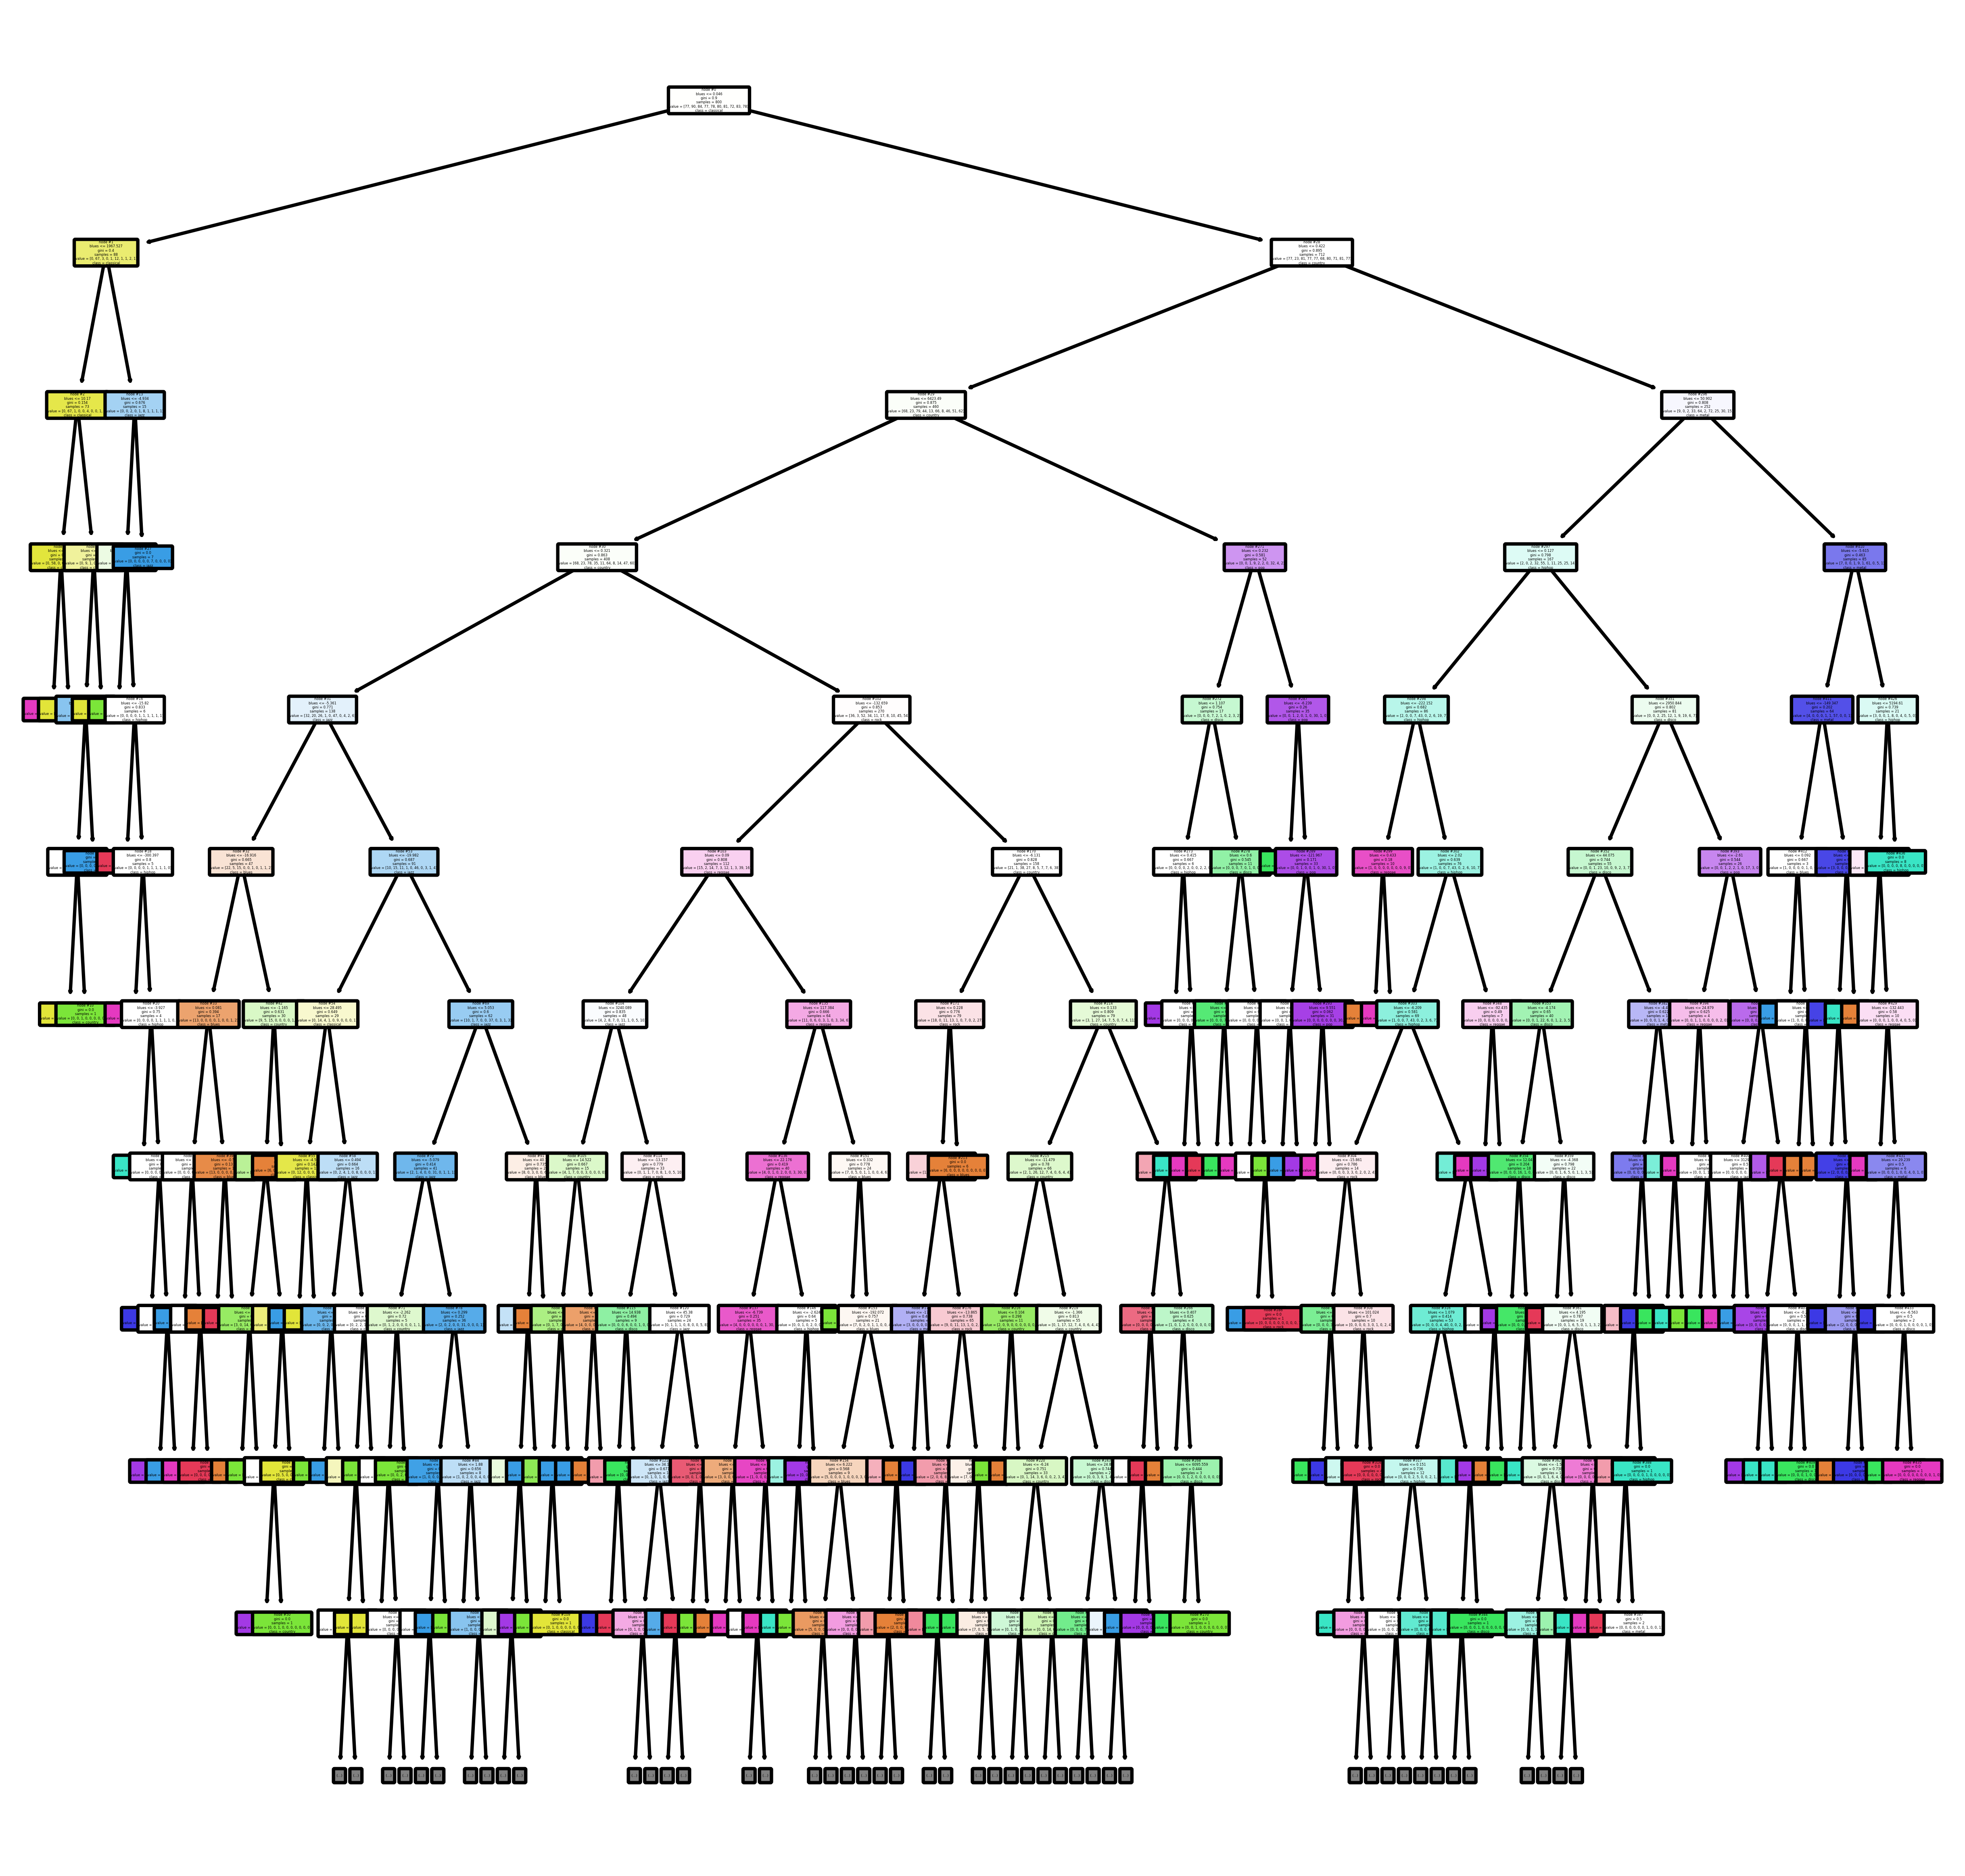

In [ ]:
import graphviz
from sklearn.tree import export_graphviz
from sklearn import tree
from matplotlib import pyplot as plt

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=600)
tree.plot_tree(clf, max_depth=10,filled=True,feature_names=df.label, class_names = clf.classes_.astype(str), rounded=True, node_ids=1)
fig.savefig('arbol.png')